<a href="https://colab.research.google.com/github/karisobomac/ATM-Bank-Note-Authentication-using-Random-Forest-Classification/blob/main/ATM_Bank_Note_Authentication_using_Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ATM Bank Note Authentication using Random Forest Classification

## Importing the libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/00267/

In [39]:
dataset = pd.read_csv('data_banknote_authentication.csv')


In [40]:
dataset.head()

,variance,skweness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [41]:
dataset.isnull().sum()

variance    0
skweness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skweness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64dbae0588>,
      dtype=object)

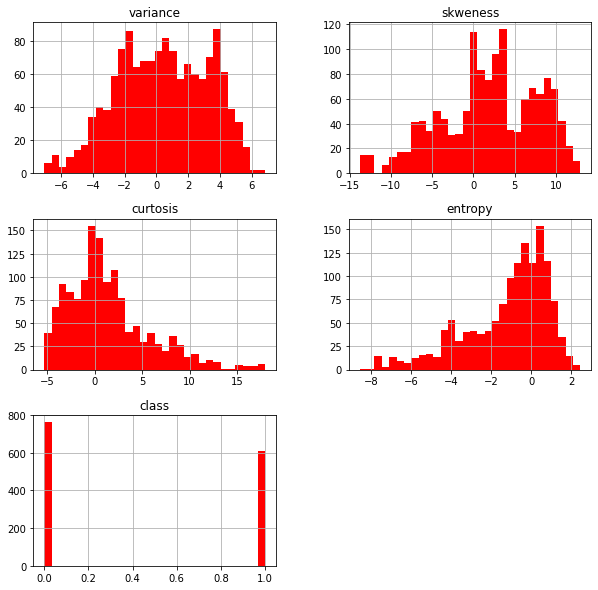

In [43]:
dataset.hist(bins= 30, figsize = (10,10), color = 'r')

In [44]:
# Independent and dependent Variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [45]:
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [46]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Splitting the dataset into the Training set and Test set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [48]:
print(X_train)

[[-1.4572    9.1214    1.7425   -5.1241  ]
 [-4.0786    2.9239    0.87026  -0.65389 ]
 [-0.90784  -7.9026    6.7807    0.34179 ]
 ...
 [ 0.6005    0.99945  -2.2126    0.097399]
 [ 2.0165   -0.25246   5.1707    1.0763  ]
 [-2.0759   10.8223    2.6439   -4.837   ]]


In [49]:
print(y_train)

[0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0
 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1
 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1
 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 

In [50]:
print(X_test)

[[ -1.7713   -10.7665    10.2184    -1.0043  ]
 [  5.1321    -0.031048   0.32616    1.1151  ]
 [ -2.0149     3.6874    -1.9385    -3.8918  ]
 ...
 [ -1.4377    -1.432      2.1144     0.42067 ]
 [ -0.89409    3.1991    -1.8219    -2.9452  ]
 [  6.8248     5.2187    -2.5425     0.5461  ]]


In [51]:
print(y_test)

[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0]


## Training the Random Forest Classification model on the Training set

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predicting the Test set results

In [53]:
y_pred = classifier.predict(X_test)


## Checking the Accuracy Score and the Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[229   3]
 [  1 179]]


0.9902912621359223

In [55]:
# Create a pickle file using serialization
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()